## 1. Dataset Preparation (data_prep)
#### We create a dataset containing incorrect HTML (`bad_html`) and their corrected versions (`correct_html`). Then, we save this dataset as a `CSV` file.

In [15]:
import pandas as pd

# Create dataset with bad & corrected HTML
data = {
    "bad_html": [
        "<p>Unclosed paragraph",
        "<html><title>Title1</title><title>Title2</title></html>",
        "<b><i>Text</b></i>",
        r'<img src="C:\Users\vkr20\OneDrive\Pictures\Saved Pictures\ABCD.jpg">',
        '<p style="color:red;">Hello</p>',
        '<font size="3">Hello</font>',
        '<div align="center">Centered text</div>',
        '<a href="#">Click</a>',
        "<html><body>Content...",
        "<!DOCTYPE>"
    ],
    "correct_html": [
        "<p>Unclosed paragraph</p>",
        "<html><head><title>Title1</title></head></html>",
        "<b><i>Text</i></b>",
        r'<img src="file:///C:\Users\vkr20\OneDrive\Pictures\Saved Pictures\ABCD.jpg" alt="Image">',
        '<p class="red-text">Hello</p>',
        '<span style="font-size: 14px;">Hello</span>',
        '<div style="text-align:center;">Centered text</div>',
        '<a href="https://example.com">Click</a>',
        "<!DOCTYPE html><html><body>Content...</body></html>",
        "<!DOCTYPE html>"
    ]
}

# Save dataset
df = pd.DataFrame(data)
df.to_csv("html_dataset.csv", index=False)

print("Dataset saved as html_dataset.csv")


Dataset saved as html_dataset.csv


## 2. Data Exploration & Visualization
#### Generate word clouds to visualize common words in `bad_html` and `correct_html`.

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("html_dataset.csv")

In [28]:
df.head()

,bad_html,correct_html
0,<p>Unclosed paragraph,<p>Unclosed paragraph</p>
1,<html><title>Title1</title><title>Title2</titl...,<html><head><title>Title1</title></head></html>
2,<b><i>Text</b></i>,<b><i>Text</i></b>
3,"<img src=""C:\Users\vkr20\OneDrive\Pictures\Sav...","<img src=""file:///C:\Users\vkr20\OneDrive\Pict..."
4,"<p style=""color:red;"">Hello</p>","<p class=""red-text"">Hello</p>"


In [29]:
df.isnull().sum()

bad_html        0
correct_html    0
dtype: int64

In [30]:
df.describe()

,bad_html,correct_html
count,10,10
unique,10,10
top,<p>Unclosed paragraph,<p>Unclosed paragraph</p>
freq,1,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bad_html      10 non-null     object
 1   correct_html  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [32]:
df.columns

Index(['bad_html', 'correct_html'], dtype='object')

In [34]:
df.shape

(10, 2)

In [35]:
df.size

20

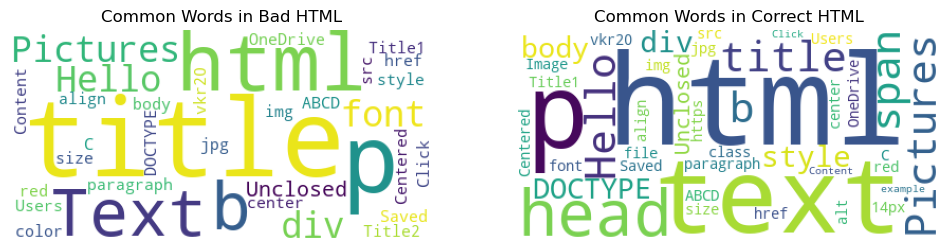

In [18]:
# Generate word clouds
bad_html_text = " ".join(df["bad_html"])
correct_html_text = " ".join(df["correct_html"])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color="white").generate(bad_html_text))
plt.axis("off")
plt.title("Common Words in Bad HTML")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color="white").generate(correct_html_text))
plt.axis("off")
plt.title("Common Words in Correct HTML")

plt.show()

## 3. Identifying Repeated Mistakes
#### Extract common HTML tags in `bad_html` and compare with `correct_html`.

In [19]:
from collections import Counter
import re

# Function to extract HTML tags
def extract_tags(html_text):
    return re.findall(r'<\s*([a-zA-Z0-9]+)', html_text)  # Extract HTML tags

# Flatten tag lists
bad_tags = sum(df["bad_html"].apply(extract_tags).tolist(), [])
correct_tags = sum(df["correct_html"].apply(extract_tags).tolist(), [])

# Count occurrences
bad_tag_counts = Counter(bad_tags)
correct_tag_counts = Counter(correct_tags)

# Convert to DataFrame
tag_df = pd.DataFrame({"Bad HTML": bad_tag_counts, "Correct HTML": correct_tag_counts}).fillna(0)

# Sort by frequency
tag_df = tag_df.sort_values("Bad HTML", ascending=False)

# Display most common mistakes
print(tag_df.head(10))


       Bad HTML  Correct HTML
p           2.0           2.0
html        2.0           2.0
title       2.0           1.0
b           1.0           1.0
i           1.0           1.0
img         1.0           1.0
font        1.0           0.0
div         1.0           1.0
a           1.0           1.0
body        1.0           1.0


In [37]:
print(bad_tags)
print(correct_tag_counts)

['p', 'html', 'title', 'title', 'b', 'i', 'img', 'p', 'font', 'div', 'a', 'html', 'body']
Counter({'p': 2, 'html': 2, 'head': 1, 'title': 1, 'b': 1, 'i': 1, 'img': 1, 'span': 1, 'div': 1, 'a': 1, 'body': 1})


In [38]:
tag_df

,Bad HTML,Correct HTML
p,2.0,2.0
html,2.0,2.0
title,2.0,1.0
b,1.0,1.0
i,1.0,1.0
img,1.0,1.0
font,1.0,0.0
div,1.0,1.0
a,1.0,1.0
body,1.0,1.0


## 4. Analyzing Corrections
#### Find differences between `bad_html` and `correct_html` to understand the most frequent modifications.

In [39]:
df["changes"] = df.apply(lambda row: set(row["correct_html"].split()) - set(row["bad_html"].split()), axis=1)

# Print first few changes
print(df[["bad_html", "correct_html", "changes"]].head())

                                            bad_html  \
0                              <p>Unclosed paragraph   
1  <html><title>Title1</title><title>Title2</titl...   
2                                 <b><i>Text</b></i>   
3  <img src="C:\Users\vkr20\OneDrive\Pictures\Sav...   
4                    <p style="color:red;">Hello</p>   

                                        correct_html  \
0                          <p>Unclosed paragraph</p>   
1    <html><head><title>Title1</title></head></html>   
2                                 <b><i>Text</i></b>   
3  <img src="file:///C:\Users\vkr20\OneDrive\Pict...   
4                      <p class="red-text">Hello</p>   

                                             changes  
0                                    {paragraph</p>}  
1  {<html><head><title>Title1</title></head></html>}  
2                               {<b><i>Text</i></b>}  
3  {Pictures\ABCD.jpg", src="file:///C:\Users\vkr...  
4                       {class="red-text">Hello</p>

## 5. Train an ML Model (train_model)
#### We use TF-IDF and RandomForestClassifier to predict corrections for bad HTML.

In [40]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("html_dataset.csv")

# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["bad_html"])
y = df["correct_html"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model
with open("html_autocorrector.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Model and vectorizer saved!")


Model and vectorizer saved!


In [41]:
vectorizer

TfidfVectorizer()

In [43]:
X

<10x31 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [46]:
y

0                            <p>Unclosed paragraph</p>
1      <html><head><title>Title1</title></head></html>
2                                   <b><i>Text</i></b>
3    <img src="file:///C:\Users\vkr20\OneDrive\Pict...
4                        <p class="red-text">Hello</p>
5          <span style="font-size: 14px;">Hello</span>
6    <div style="text-align:center;">Centered text<...
7              <a href="https://example.com">Click</a>
8    <!DOCTYPE html><html><body>Content...</body></...
9                                      <!DOCTYPE html>
Name: correct_html, dtype: object

In [47]:
model

RandomForestClassifier(random_state=42)

In [48]:
model_file

<_io.BufferedWriter name='html_autocorrector.pkl'>

## 6. Model Performance Visualization
> **Feature Importance**: Show which `HTML` terms are the most important for correction.

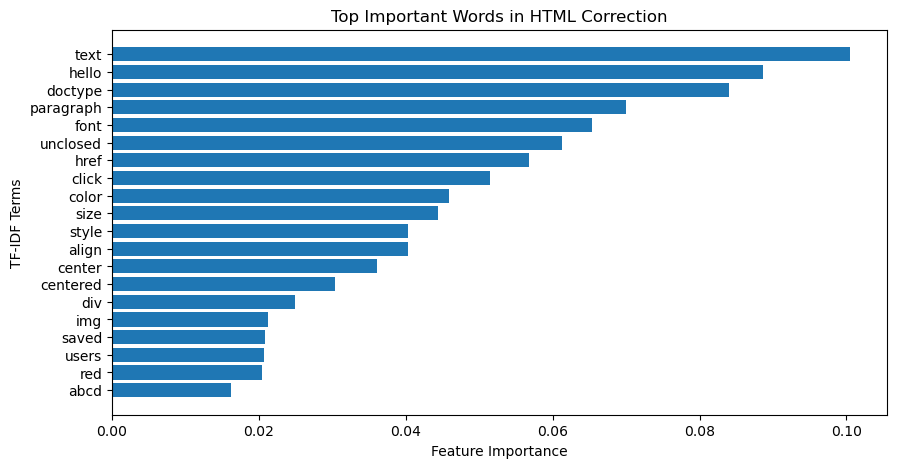

In [22]:
import numpy as np

feature_importances = model.feature_importances_
features = np.array(vectorizer.get_feature_names_out())

top_n = 20  # Number of top features to display
sorted_idx = np.argsort(feature_importances)[::-1][:top_n]

plt.figure(figsize=(10, 5))
plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("TF-IDF Terms")
plt.title("Top Important Words in HTML Correction")
plt.gca().invert_yaxis()
plt.show()